In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
raw_data = pd.read_csv('raw_clinic_data.csv')
raw_data['No-show'] = raw_data['No-show'].replace({'No': 0, 'Yes': 1})
raw_data['AppointmentDay'] = pd.to_datetime(raw_data['AppointmentDay'])
raw_data['ScheduledDay'] = pd.to_datetime(raw_data['ScheduledDay'])
raw_data['time difference'] = raw_data['AppointmentDay'] - raw_data['ScheduledDay']
raw_data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time difference
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34 days 14:44:25
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34 days 16:32:27
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40 days 07:56:08
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40 days 08:50:37
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,0,40 days 10:29:04


In [111]:
#convert to time difference = 0 
# make 2 features - one a binary encoded feature of same day vs not same day appointment
# 2nd feature is to convert the time diff timedelta into an integer value to measure the magnitude 
# of diff between apppintment book and actual appointment day
raw_data.sort_values(by = "time difference")
negative_scheduled = raw_data[raw_data['time difference'] < pd.Timedelta(1)]
negative_scheduled.value_counts('No-show')



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time difference
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1 days +07:52:37


In [36]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


In [8]:
#check for class imbalance - focus on PR and PR Curve, can augment data for class imbalance later 
raw_data['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [27]:
raw_data.columns 
filter_df = raw_data[['Gender', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']]
filter_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

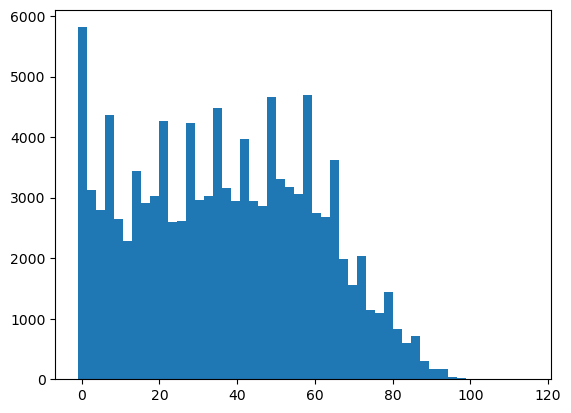

In [38]:
plt.hist(raw_data['Age'], bins = 50 )
plt.show

In [18]:
neigh_NS = raw_data.groupby('Neighbourhood')['No-show'].sum().sort_values(ascending = False)
pd.DataFrame(neigh_NS)

,No-show
Neighbourhood,
JARDIM CAMBURI,1465
MARIA ORTIZ,1219
ITARARÉ,923
RESISTÊNCIA,906
CENTRO,703
...,...
ILHA DO BOI,3
ILHA DO FRADE,2
ILHAS OCEÂNICAS DE TRINDADE,2


<AxesSubplot:xlabel='Scholarship'>

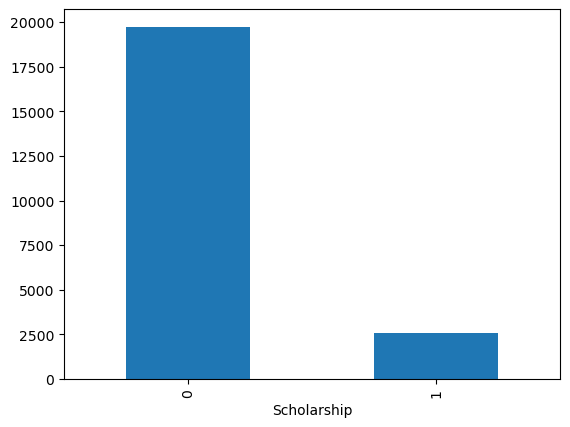

In [89]:
raw_data.groupby('Scholarship')['No-show'].sum().sort_values(ascending = False).plot(kind="bar")

<AxesSubplot:xlabel='Hipertension'>

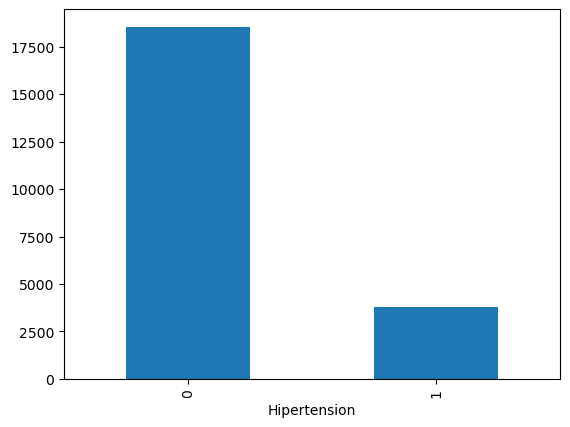

In [91]:
raw_data.groupby('Hipertension')['No-show'].sum().sort_values(ascending = False).plot(kind="bar")


<AxesSubplot:xlabel='Diabetes'>

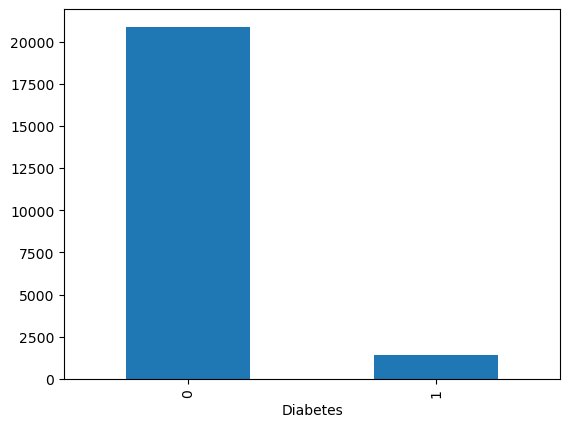

In [92]:
raw_data.groupby('Diabetes')['No-show'].sum().sort_values(ascending = False).plot(kind="bar")

<AxesSubplot:xlabel='Alcoholism'>

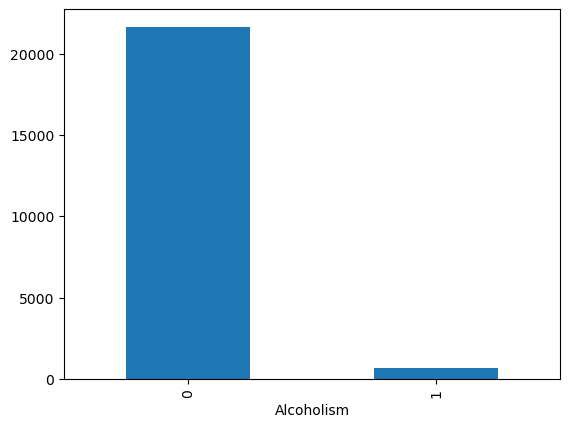

In [93]:

raw_data.groupby('Alcoholism')['No-show'].sum().sort_values(ascending = False).plot(kind="bar")

<AxesSubplot:xlabel='Handcap'>

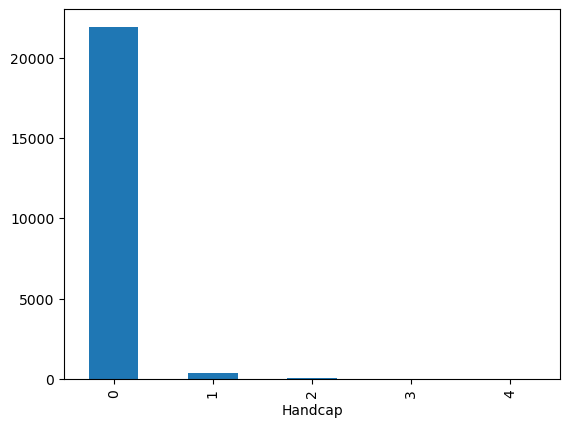

In [94]:
raw_data.groupby('Handcap')['No-show'].sum().sort_values(ascending = False).plot(kind="bar")

<AxesSubplot:xlabel='Gender'>

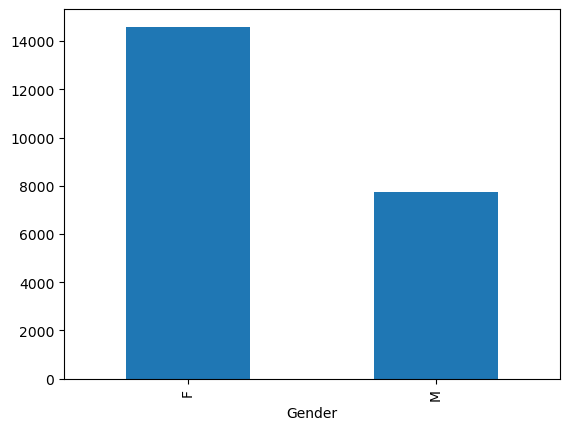

In [87]:
raw_data.groupby('Gender')['No-show'].sum().sort_values(ascending = False).plot(kind="bar")

<AxesSubplot:xlabel='SMS_received'>

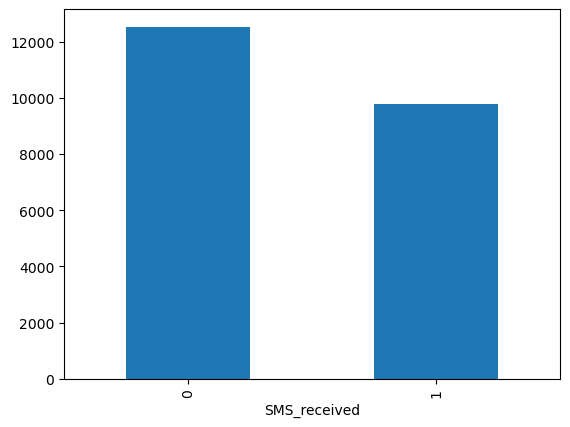

In [88]:
raw_data.groupby('SMS_received')['No-show'].sum().sort_values(ascending = False).plot(kind="bar") 

In [51]:
#~20% no shows age 0-10
#totoal ~18K
raw_data[raw_data["Age"]<=10]["No-show"].value_counts()


0    14962
1     3788
Name: No-show, dtype: int64

In [47]:
#~14% no shows age 20-30
#totoal ~15K

raw_data[ (raw_data["Age"]>=20) & (raw_data["Age"]<=30) ]["No-show"].value_counts()

0    11471
1     3749
Name: No-show, dtype: int64

In [50]:
#~22% no shows age 30-40
#totoal ~16K

raw_data[ (raw_data["Age"]>=30) & (raw_data["Age"]<=40) ]["No-show"].value_counts()

0    12972
1     3601
Name: No-show, dtype: int64

In [52]:
#~19% no shows age 40-50
#totoal ~16K

raw_data[ (raw_data["Age"]>=40) & (raw_data["Age"]<=50) ]["No-show"].value_counts()

0    12651
1     3171
Name: No-show, dtype: int64

In [53]:
#~17% no shows age 50-60
#totoal ~17K

raw_data[ (raw_data["Age"]>=50) & (raw_data["Age"]<=60) ]["No-show"].value_counts()

0    14262
1     3012
Name: No-show, dtype: int64

In [54]:
#~14% no shows age 60-70
#totoal ~12K

raw_data[ (raw_data["Age"]>=60) & (raw_data["Age"]<=70) ]["No-show"].value_counts()

0    10716
1     1884
Name: No-show, dtype: int64

<AxesSubplot:xlabel='Age'>

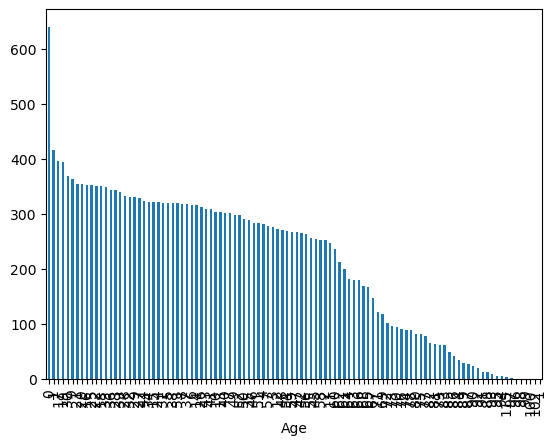

In [23]:
#explore the age column 
#the highest number of no shows --> children 
# age v. no show --> age has outliers 
raw_data.groupby('Age')['No-show'].sum().sort_values(ascending = False).plot(kind="bar")
raw_data['Age']

,No-show,appointment_counts,No-show-normalized
Neighbourhood,,,
ILHA DO BOI,3,35,8.571429
ILHA DO FRADE,2,10,20.000000
ILHAS OCEÂNICAS DE TRINDADE,2,2,100.000000
AEROPORTO,1,8,12.500000
PARQUE INDUSTRIAL,0,1,0.000000


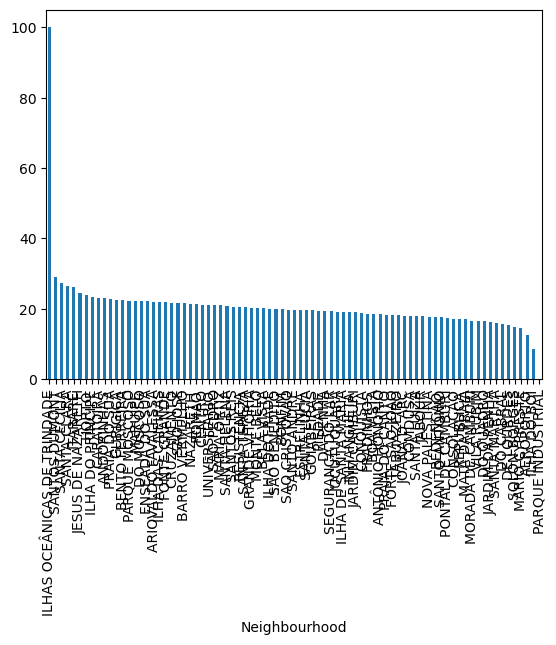

In [76]:
df = pd.DataFrame(raw_data.groupby('Neighbourhood')['No-show'].sum().sort_values(ascending = False))#.plot(kind="bar")
neigh_counts = pd.DataFrame(raw_data.value_counts('Neighbourhood'))
df = df.merge(neigh_counts, on="Neighbourhood", how="left")
df.columns = ["No-show", "appointment_counts"]


df["No-show-normalized"] = (df["No-show"]/df["appointment_counts"])*100
df["No-show-normalized"].sort_values(ascending = False).plot(kind="bar")
df.tail()

In [ ]:
#feature engineering - lag between appointments 